In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('NYC_property_sales.csv')
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

Sample Mean: 2076052.2009431492
Difference between Population and Sample Mean: 355289.64561367827
Z-Critical Value: 1.959963984540054
Confidence Interval: (1485034.871144839, 2667069.530741459)


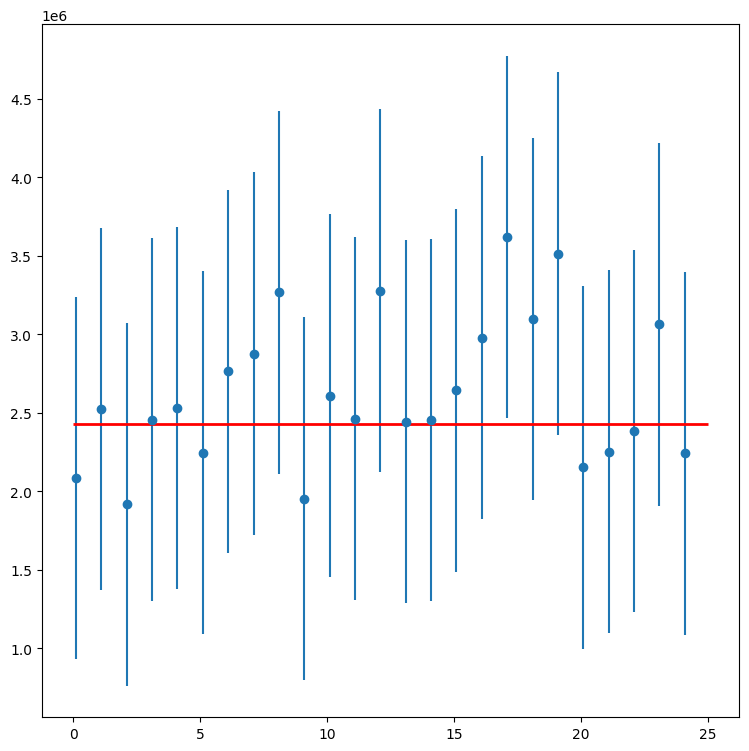

In [26]:
import matplotlib.pyplot as plt

def main2():
    # Assuming sale price is stored in a numpy array named 'sale_price'
    sale_price = df['sale_price'].to_numpy()
    
    np.random.seed(10)
    sample_size_percentage = 10  # Change this value as needed
    sample_size = int(len(df) * (sample_size_percentage / 100))
    sample_sale_price = np.random.choice(a=sale_price, size=sample_size)
    sample_mean = sample_sale_price.mean()
    
    print("Sample Mean:", sample_mean)
    
    population_mean = sale_price.mean()
    difference = population_mean - sample_mean
    
    print("Difference between Population and Sample Mean:", difference)
    
    z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value for 95% confidence level
    
    print("Z-Critical Value:", z_critical)
    
    pop_stdev = sale_price.std()  # Get the population standard deviation
    
    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    print("Confidence Interval:", confidence_interval)
    
    np.random.seed(12)

    sample_size = 1000
    
    intervals = []
    sample_means = []
    
    for sample in range(25):
        sample = np.random.choice(a=sale_price, size=sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
        z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value for 95% confidence level
    
        pop_stdev = sale_price.std()  # Get the population standard deviation
    
        margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
        confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
        
        intervals.append(confidence_interval)
        
    plt.figure(figsize=(9, 9))
    plt.errorbar(x=np.arange(0.1, 25, 1), 
                 y=sample_means, 
                 yerr=[abs((top - bot) / 2) for top, bot in intervals],
                 fmt='o')
    
    plt.hlines(xmin=0, xmax=25,
               y=population_mean, 
               linewidth=2.0,
               color="red")
    plt.show()

main2()

Sample Mean: 2076052.2009431492
Difference between Population and Sample Mean: 355289.64561367827
Z-Critical Value: 1.959963984540054
Confidence Interval: (1485034.871144839, 2667069.530741459)


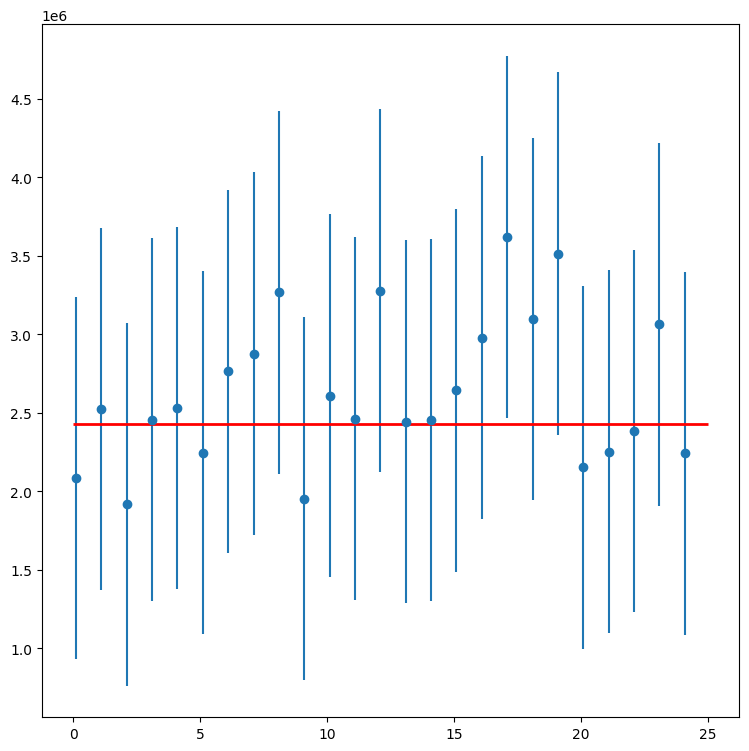

Z-Score: -1.7445163651352473
P-Value: 0.08106909030238074
Fail to reject null hypothesis: There is no significant difference between the sample and population means.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

def hypothesis_testing(sample, population_mean, alpha=0.05):
    # Calculate z-score
    z_score = (sample.mean() - population_mean) / (sample.std() / np.sqrt(len(sample)))
    
    # Calculate p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test
    
    # Print results
    print("Z-Score:", z_score)
    print("P-Value:", p_value)
    
    # Check significance
    if p_value < alpha:
        print("Reject null hypothesis: There is a significant difference between the sample and population means.")
    else:
        print("Fail to reject null hypothesis: There is no significant difference between the sample and population means.")

def main2():
    # Assuming sale price is stored in a numpy array named 'sale_price'
    sale_price = df['sale_price'].to_numpy()
    
    np.random.seed(10)
    sample_size_percentage = 10  # Change this value as needed
    sample_size = int(len(df) * (sample_size_percentage / 100))
    sample_sale_price = np.random.choice(a=sale_price, size=sample_size)
    sample_mean = sample_sale_price.mean()
    
    print("Sample Mean:", sample_mean)
    
    population_mean = sale_price.mean()
    difference = population_mean - sample_mean
    
    print("Difference between Population and Sample Mean:", difference)
    
    z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value for 95% confidence level
    
    print("Z-Critical Value:", z_critical)
    
    pop_stdev = sale_price.std()  # Get the population standard deviation
    
    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    print("Confidence Interval:", confidence_interval)
    
    np.random.seed(12)

    sample_size = 1000
    
    intervals = []
    sample_means = []
    
    for sample in range(25):
        sample = np.random.choice(a=sale_price, size=sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    
        z_critical = stats.norm.ppf(q=0.975)  # Get the z-critical value for 95% confidence level
    
        pop_stdev = sale_price.std()  # Get the population standard deviation
    
        margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))
    
        confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
        
        intervals.append(confidence_interval)
        
    plt.figure(figsize=(9, 9))
    plt.errorbar(x=np.arange(0.1, 25, 1), 
                 y=sample_means, 
                 yerr=[abs((top - bot) / 2) for top, bot in intervals],
                 fmt='o')
    
    plt.hlines(xmin=0, xmax=25,
               y=population_mean, 
               linewidth=2.0,
               color="red")
    plt.show()
    
    # Perform hypothesis testing
    hypothesis_testing(sample_sale_price, population_mean)

main2()


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column contains strings
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()
print(correlation_matrix)

ModuleNotFoundError: No module named 'sklearn'